## Penguins

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

> - **`.head()`** prints the **header** of a DataFrame.
> - **`.dtypes`** prints **datatypes** of all columns in a DataFrame.
> - **`.info()`** provides a bird's eye view of column **data types** and **missing values** in a DataFrame.
> - **`.describe()`** returns a **distribution of numeric columns** in your DataFrame.
> - **`.isna().sum()`** allows us to break down the **number of missing values per column** in our DataFrame.
> - **`.unique()`** finds the **number of unique values** in a DataFrame column.
> - **`sns.displot()`** **plots the distribution of one column** in your DataFrame.

In [13]:
penguins = pd.read_csv("penguins_size.csv")
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [19]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The dataset contains 344 penguins, with info about their speices, the island they live on, and their physical measurements such as culmen length, culmen depth, flipper length, and body mass. There are a few missing values in the measurement columns and in the sex column. Most data is complete, so we can compare penguin sizes across species and islands.

In [22]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


The penguins in the dataset vary quite a bit in size. On average, they have a culmen length of aroudn 44mm, flipper length of about 201mm, and a body mass of about 4200 grams. Some penguins are much smaller, weighing as little as 2700 grams, while the largest reach up to 6300 grams. The flipper length also ranges widely from 172mm to 231mm, showing clear differences in body size among the penguins.

In [25]:
penguins.dropna()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


The dataset now has 334 complete records with no missing values. Adelie penguins generally have smaller flipper lengths and body mass compared to Gentoo penguins. Gento Penguins stand out as the largest species, with flippers above 210mm and body mass often above 5000g. Within each species, males tend to be heavier and slightly larger than females.

In [28]:
penguins.groupby("species")["flipper_length_mm"].mean()
penguins.groupby("species")["body_mass_g"].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

> - **Adelie** penguins average about **3700g** in body mass.
> - **Chinstrap** penguins are very close, averaging about **3733g**
> - **Gentoo** penguins are much larger, averaging about **5076g**.

This shows that Gentoo penguins are clearly the heaviest species, while Adelie and Chinstrap are similar in size 

In [37]:
penguins.corr(numeric_only=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


The data shows that penguins with longer flippers also tend to have higher bodymass, and this is the strongest relationship. Culmen length is also positively related to both flipper length and body mass, meaning longer-billed penguins are generally bigger. On the other hand, culmen (bill) depth is negatively correlated with flipper length and body mass, suggesting that penguins with deeper bills are usually smaller.

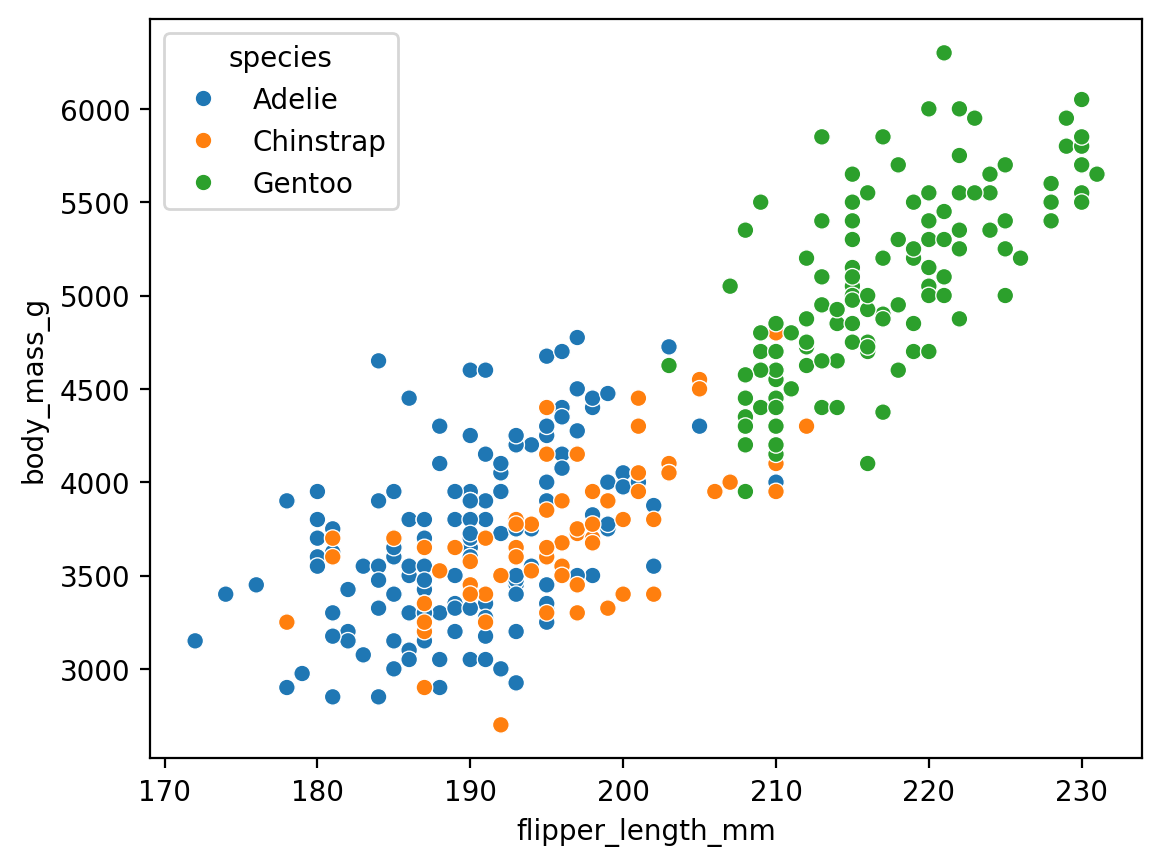

In [42]:
sns.scatterplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species")
plt.show()

In this scatterplot, penguins with the longer flippers clearly weigh more, showing a positive relationship between flipper length and bodymass. Gentoo penguins cluster at the higher end of both bodymass and flipper length, standing out as the biggest species. Adelie and Chinstrap overlap more, with both having shorter flippers and lighter bodies compared to Gentoo, though Chinstrap tends to be slightly heavier. The hue separation makes it clear that species groupings align well with size differences.

## Conclusion
> - The dataset had a few missing values, which were dropped for cleaner analysis.
> - Gentoo penguins are the largest overall, with the highest average body mass and flipper length.
> - Adelie and Chinstrap penguins are closer in size, though chinstrap tends to be slightly heavier.
> - Body mass and flipper length are strongly positiveley correlated - bigger penguins haave longer flippers.
> - Scatterplots show clear separation between species based on size, especially Gentoo standing out.

Overall, penguin size differences are strongly linked to species, physical traits like flipper length and body mass are closely related